In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
#tidak menampilkan warning pada output
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import dataset dalam bentuk csv
df = pd.read_csv('Dry_Bean_Dataset.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
#jumlah baris dan kolom dataset
df.shape

(13611, 17)

In [7]:
#memeriksa tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
#melihat statistik data
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
#melihat banyaknya jenis kacang yang muncul pada dataset
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [10]:
#pengecekan data missing
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
#pengecekan data duplikat
df.duplicated().sum()

68

In [12]:
#menampilkan data duplikat
duplicate_mask =df.duplicated()
duplicate_rows = df[duplicate_mask]
print(duplicate_rows)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5505  33518    702.956       277.571399       154.305581      1.798842   
5509  33954    716.750       277.368480       156.356326      1.773951   
5548  38427    756.323       306.533886       160.591784      1.908777   
5554  38891    791.343       319.499996       156.869619      2.036723   
5599  40804    790.802       323.475648       163.287717      1.981016   
...     ...        ...              ...              ...           ...   
7263  63408   1005.966       412.551649       196.337705      2.101235   
7278  63882   1004.206       411.263403       198.765453      2.069089   
7285  63948    996.497       412.297178       198.877557      2.073121   
7340  65766   1035.842       406.416622       207.242369      1.961069   
7342  65781   1039.257       409.713859       204.992832      1.998674   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5505      0.831240       34023 

In [13]:
#penghapusan data duplikat dan pengecekan jumlah dataset
df= df.drop_duplicates()
df.shape

(13543, 17)

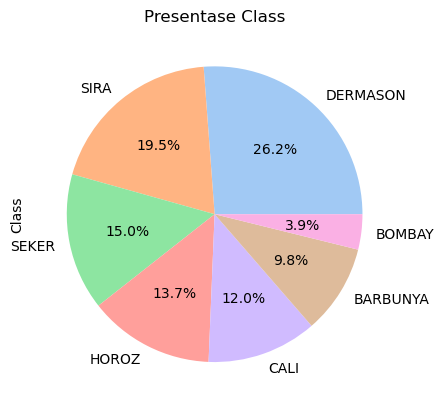

In [14]:
#explore data
sns.set_palette('pastel')
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Class')
plt.show()

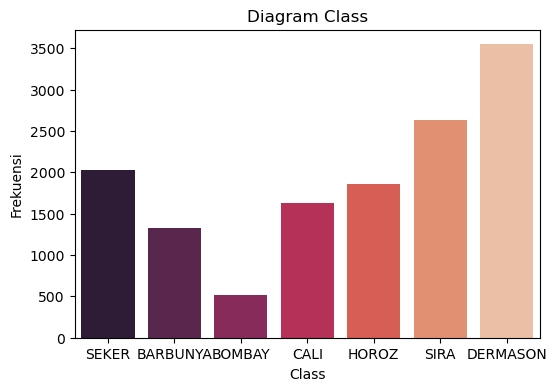

In [15]:
#diagram kolom Class 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette='rocket')
plt.title('Diagram Class')
plt.xlabel('Class')
plt.ylabel('Frekuensi')
plt.show()

In [16]:
#menampilkan korelasi antar kolom
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150


<Axes: >

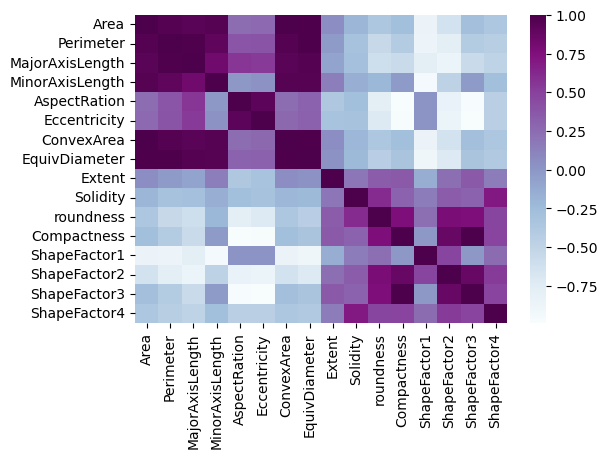

In [17]:
#korelasi antar kolom dataset dalam plot palette
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu')

In [18]:
#pembagian data
X = df.drop(columns=['Class'])
y = df['Class']
print(X.shape)
print(y.shape)

(13543, 16)
(13543,)


In [19]:
#pemisahan data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#pengecekan jumlah data testing
print(X_test.shape)
print(y_test.shape)

(2709, 16)
(2709,)


In [21]:
#training model
import time
model =SVC()
start_time =time.time()
model.fit(X_train, y_train)
end_time =time.time()
training_time = end_time - start_time

predictions =model.predict(X_test)
print(classification_report(y_test, predictions))
print("Training time : {:.2f} seconds".format(training_time))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.93      0.96      0.95       305
    DERMASON       0.92      0.92      0.92       707
       HOROZ       0.97      0.95      0.96       376
       SEKER       0.95      0.94      0.95       414
        SIRA       0.88      0.89      0.88       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

Training time : 1.07 seconds


In [22]:
#tuning hyperparameter untuk mencari parameter dengan score terbaik
from sklearn.model_selection import GridSearchCV

param_grid ={'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf','linear','poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   4.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   4.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   4.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   5.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   4.9s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.6s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.916 total time=   1.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [23]:
#best parameter
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [24]:
#testing data menggunakan best parameter
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print('Hasil pemeriksaan data testing :', grid_predictions)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.93      0.96      0.95       305
    DERMASON       0.92      0.93      0.93       707
       HOROZ       0.98      0.95      0.97       376
       SEKER       0.95      0.95      0.95       414
        SIRA       0.88      0.89      0.89       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

Hasil pemeriksaan data testing : ['SEKER' 'CALI' 'DERMASON' ... 'DERMASON' 'SIRA' 'SIRA']


In [40]:
clf = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [45]:
#Evaluasi data testing
y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Evaluasi data testing")
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 score:", f1_test)

Evaluasi data testing
Test Accuracy: 0.9328165374677002
Test Precision: 0.9331092461696762
Test Recall: 0.9328165374677002
Test F1 score: 0.9328910983780544


In [44]:
#evaluasi data training
y_pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("evaluasi data training")
print("Train Accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train recall:", recall_train)
print("Train f1 score:", f1_train)

evaluasi data training
Train Accuracy: 0.9334502492154328
Train precision: 0.9337256232453839
Train recall: 0.9334502492154328
Train f1 score: 0.9335414509199417


In [28]:
#menyimpan hasil evaluasi data training dan data testing
train_Score = [accuracy_train, precision_train, recall_train, f1_train]
test_Score = [accuracy_test, precision_test, recall_test, f1_test]

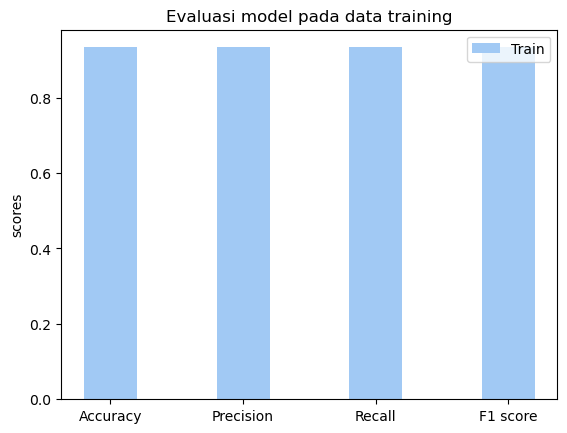

In [29]:
#visualisasi dari evaluasi  model data training
labels =['Accuracy', 'Precision', 'Recall', 'F1 score']
x = np.arange(len(labels))
width = 0.40

plt.bar(x, train_Score, width, label='Train')

plt.ylabel('scores')
plt.title('Evaluasi model pada data training')
plt.xticks(x, labels)
plt.legend()

plt.show()


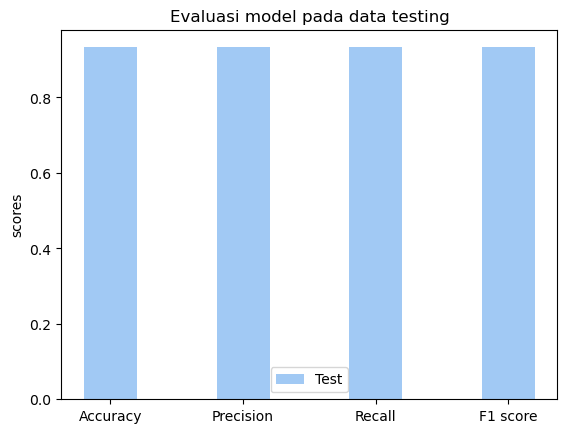

In [30]:
#visualisasi dari evaluasi  model data testing
labels =['Accuracy', 'Precision', 'Recall', 'F1 score']
x = np.arange(len(labels))
width = 0.40

plt.bar(x, test_Score, width, label='Test')

plt.ylabel('scores')
plt.title('Evaluasi model pada data testing')
plt.xticks(x, labels)
plt.legend()

plt.show()


In [31]:
#inisialisasi confusion matrix untuk data training dan data testing
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

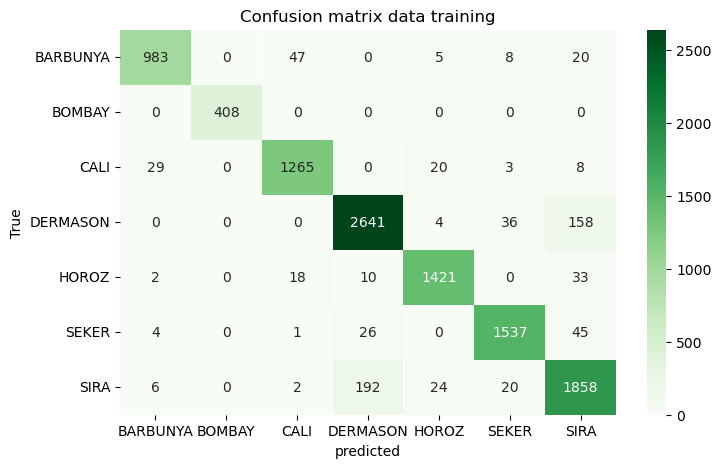

[[ 983    0   47    0    5    8   20]
 [   0  408    0    0    0    0    0]
 [  29    0 1265    0   20    3    8]
 [   0    0    0 2641    4   36  158]
 [   2    0   18   10 1421    0   33]
 [   4    0    1   26    0 1537   45]
 [   6    0    2  192   24   20 1858]]


In [32]:
#confusion matrix data training
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d',cmap='Greens', xticklabels=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], yticklabels=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'])
plt.title('Confusion matrix data training')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()
conf_matrix_train_array = np.array(confusion_matrix_train)
print(conf_matrix_train_array)

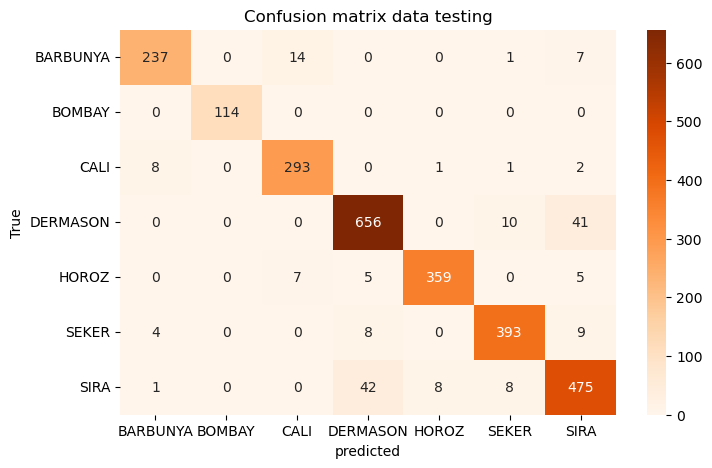

[[237   0  14   0   0   1   7]
 [  0 114   0   0   0   0   0]
 [  8   0 293   0   1   1   2]
 [  0   0   0 656   0  10  41]
 [  0   0   7   5 359   0   5]
 [  4   0   0   8   0 393   9]
 [  1   0   0  42   8   8 475]]


In [33]:
#conf matrix data testing
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d',cmap='Oranges', xticklabels=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], yticklabels=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'])
plt.title('Confusion matrix data testing')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()
conf_matrix_test_array = np.array(confusion_matrix_test)
print(conf_matrix_test_array)

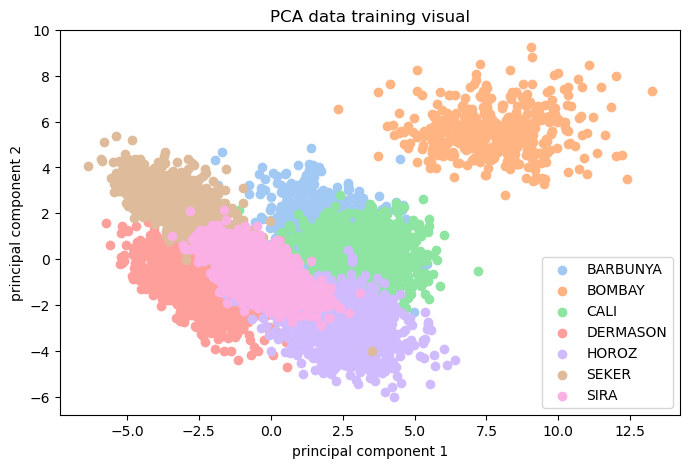

In [34]:
from sklearn.decomposition import PCA
#PCA (melihat pesebaran data)
#PCA data Training
pca = PCA(n_components=2)
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

plt.figure(figsize=(8, 5))
for label in np.unique(y_train):
    indices =np.where(y_train == label)
    plt.scatter(PCA_X_train[indices, 0], PCA_X_train[indices, 1], label=label)
plt.title('PCA data training visual')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()

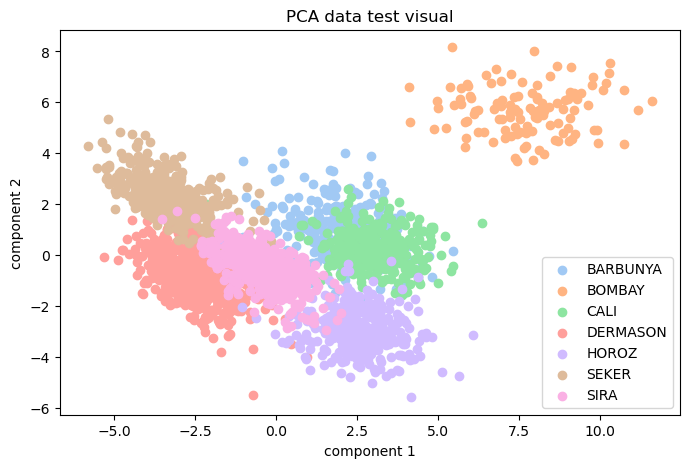

In [35]:
#PCA data testing
plt.figure(figsize=(8, 5))
for label in np.unique(y_test):
    indices =np.where(y_test == label)
    plt.scatter(PCA_X_test[indices, 0], PCA_X_test[indices, 1], label=label)
plt.title('PCA data test visual')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend()
plt.show()

In [36]:
import pickle
pickle_file_dir = open("svm.pkl", "wb")

pickle.dump(grid, pickle_file_dir)
pickle_file_dir.close()